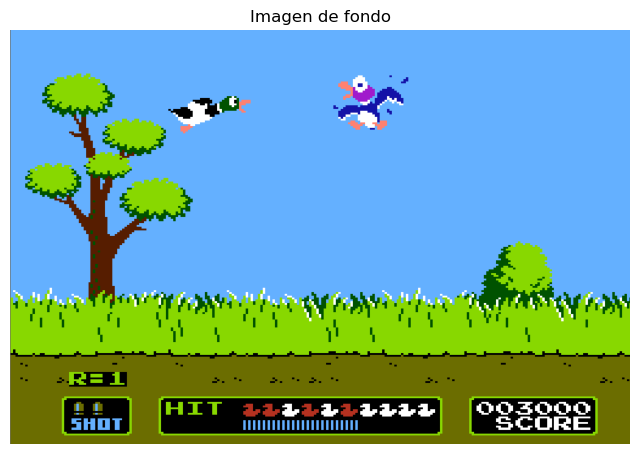

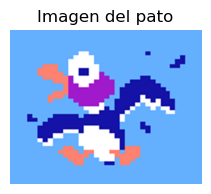

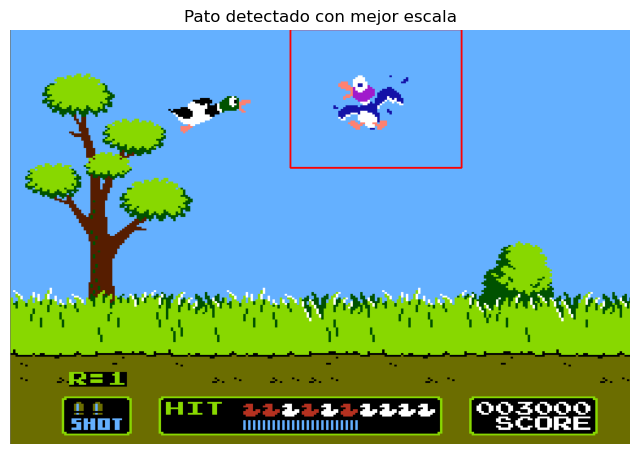

Mejor coincidencia en escala, coordenadas: (460, 0) -> (741, 227) (Valor: 0.2549102306365967)


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imágenes
im_bg = cv2.imread("./images/duck_hunt_2.png", cv2.IMREAD_COLOR)
im_duck = cv2.imread("./images/dpato_2.png", cv2.IMREAD_COLOR)

# Convertir de BGR a RGB para visualización
im_bg_rgb = cv2.cvtColor(im_bg, cv2.COLOR_BGR2RGB)
im_duck_rgb = cv2.cvtColor(im_duck, cv2.COLOR_BGR2RGB)

# Mostrar imágenes originales
plt.figure(figsize=(8, 6))
plt.imshow(im_bg_rgb)
plt.title("Imagen de fondo")
plt.axis('off')
plt.show()

plt.figure(figsize=(3, 2))
plt.imshow(im_duck_rgb)
plt.title("Imagen del pato")
plt.axis('off')
plt.show()

# Redimensionar el pato a diferentes escalas para mejorar detección
scales = [1.0, 0.9, 0.8, 0.7, 0.6]  # Probar con diferentes escalas
best_match = None
best_val = -1
best_top_left = (0, 0)
best_bottom_right = (0, 0)

for scale in scales:
    im_duck_resized = cv2.resize(im_duck, (0, 0), fx=scale, fy=scale)  # Redimensionar
    
    result = cv2.matchTemplate(im_bg, im_duck_resized, cv2.TM_CCOEFF_NORMED)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    if max_val > best_val:  # Guardar la mejor coincidencia
        best_val = max_val
        best_top_left = max_loc
        h, w = im_duck_resized.shape[:2]
        best_bottom_right = (best_top_left[0] + w, best_top_left[1] + h)

# Dibujar la detección en la imagen
im_result = im_bg.copy()
cv2.rectangle(im_result, best_top_left, best_bottom_right, color=(0, 0, 255), thickness=2)

# Mostrar la imagen con el pato detectado
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(im_result, cv2.COLOR_BGR2RGB))
plt.title("Pato detectado con mejor escala")
plt.axis('off')
plt.show()

# Imprimir coordenadas detectadas
print(f"Mejor coincidencia en escala, coordenadas: {best_top_left} -> {best_bottom_right} (Valor: {best_val})")
